In [111]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import copy
import math as Math
from dx import dx

In [5]:
%%spark
--conf spark.yarn.queue=root.zw02.hadoop-wallepnc.query
--conf spark.driver.maxResultSize=4g
--conf spark.driver.memory=8g
--conf spark.executor.memory=8g
--conf spark.executor.cores=3
--conf spark.yarn.executor.memoryOverhead=2072
--conf spark.dynamicAllocation.enabled=true
--conf spark.dynamicAllocation.minExecutors=600
--conf spark.dynamicAllocation.maxExecutors=1000
--conf spark.sql.shuffle.partitions=6000
--conf spark.memory.fraction=0.7
--conf spark.sql.autoBroadcastJoinThreshold=1048576000

,Driver日志,队列信息
,/home/sankuai/logs/spark-1613977134.log,root.zw02.hadoop-wallepnc.query


CmdOutput(['tail', '-50', '/home/sankuai/logs/spark-1613977134.log'], 2)

,SparkSession,SparkContext,Job Search/applicationId
链接/变量名,spark,sc,application_1594464964771_12997723


In [118]:
%%spark
--conf spark.yarn.queue=root.zw02.hadoop-wallepnc.query
--conf spark.driver.maxResultSize=8g
--conf spark.driver.memory=8g
--conf spark.executor.memory=8g
--conf spark.executor.cores=2
--conf spark.yarn.executor.memoryOverhead=2072
--conf spark.dynamicAllocation.enabled=true
--conf spark.dynamicAllocation.minExecutors=600
--conf spark.dynamicAllocation.maxExecutors=1000
--conf spark.sql.shuffle.partitions=6000
--conf spark.memory.fraction=0.5
--conf spark.sql.autoBroadcastJoinThreshold=1048576000

,Driver日志,队列信息
,/home/sankuai/logs/spark-1614126995.log,root.zw02.hadoop-wallepnc.query


CmdOutput(['tail', '-50', '/home/sankuai/logs/spark-1614126995.log'], 2)

,SparkSession,SparkContext,Job Search/applicationId
链接/变量名,spark,sc,application_1611827986505_2148584


In [117]:
spark.stop()

In [113]:


def isneededdata(decisions_string):
    kWidth = 1.5
    decisions = json.loads(decisions_string)
    
    #合并障碍物
    for decision1 in decisions:
        end_s = decision1['sMax']
        start_s = decision1['sMin']
        
       
        for decision2 in decisions:
            if type(decision1['lMin']) != float or type(decision1['lMax']) != float or type(decision2['lMin']) != float or type(decision2['lMax']) != float or type(decision1['sMin']) != float or type(decision1['sMax']) != float or type(decision2['sMin']) != float or type(decision2['sMax']) != float:
                return False
            if decision2['sMin'] < end_s and decision2['sMin'] > start_s:
                
                # case 1:  2 on the left
                if(decision2['lMax'] > decision1['lMax'] and decision2['lMin'] - decision1['lMax'] < kWidth):
                    decision2['lMin'] = min(decision2['lMin'],decision1['lMin'])
                    decision1['lMax'] = max(decision2['lMax'],decision1['lMax'])
                    
                # case 2: 2 on the right 
                if(decision1['lMax'] > decision2['lMax'] and decision1['lMin'] - decision2['lMax'] < kWidth):
                    decision2['lMax'] = max(decision2['lMax'],decision1['lMax'])
                    decision1['lMin'] = min(decision2['lMin'],decision1['lMin'])
                    
    # if multi decision exists      
    for decision in decisions:      
        if decision['leftWidth'] - decision['lMax'] >= kWidth and -decision['rightWidth'] + decision['lMin'] >= kWidth:
            print(decision['id'])
            return True
            
    return False

In [251]:
ans = 0
data_new = []
for data in data_numpy:
    if isneededdata(data[0]):
        data_new.append(data)
        ans+=1
print(ans)

11637


In [8]:
data_new[1000]

NameError: name 'data_new' is not defined

In [13]:
isneededdata('[{"type":"LEFT_NUDGE","id":"163_0","lMin":-2.220383661525651,"lMax":-0.06716485476356948,"leftWidth":4.857920943066828,"rightWidth":-1.4637138980163111,"isDynamic":true,"sMin":22.023408308649003,"sMax":39.448037884126705,"perceptionId":163}]')

False

In [114]:
spark.udf.register("ISNEEDEDDATAA", isneededdata)

In [115]:
db = 'mart_wallepnc_hulk'


In [116]:
%%sql t --preview --quiet
select ISNEEDEDDATAA('[{{"type":"LEFT_NUDGE","id":"163_0","lMin":-2.220383661525651,"lMax":-0.06716485476356948,"leftWidth":4.857920943066828,"rightWidth":-1.4637138980163111,"isDynamic":true,"sMin":22.023408308649003,"sMax":39.448037884126705,"perceptionId":163}}]')

Py4JJavaError: An error occurred while calling o1822.collectToPython.
: java.lang.IllegalStateException: SparkContext has been shutdown
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2052)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2081)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2100)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:336)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply$mcI$sp(Dataset.scala:2807)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:2804)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:2804)
	at org.apache.spark.sql.execution.SQLExecution$.withNewQueryId(SQLExecution.scala:56)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:90)
	at org.apache.spark.sql.Dataset.withNewExecutionId(Dataset.scala:2827)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:2804)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)


In [44]:
k = '[{"type":"LEFT_NUDGE","id":"163_0","lMin":-2.220383661525651,"lMax":-0.06716485476356948,"leftWidth":4.857920943066828,"rightWidth":-1.4637138980163111,"isDynamic":true,"sMin":22.023408308649003,"sMax":39.448037884126705,"perceptionId":163}]'

In [26]:
isneededdata(k)

NameError: name 'k' is not defined

In [21]:
%%sql t --preview --quiet
SELECT get_json_object(`debug`,'$.planningData.obstacleDecider.decisions') as obstacles,
       autocar_name,
       timestamp,
       frame_id,
       `git-branch`,
       main_decision,
       hour,
       record_name,
       hdmap_version,
       heading,
       get_json_object(`debug`,'$.planningData.intention.intentionType') as intention_type,
       get_json_object(`debug`,'$.planningData.intention.refL') as ref_l,
       is_auto
  FROM mart_wallepnc_hulk.detail_planning
  where  dt > '20210114'
   and (autocar_name like 'zcx%' or autocar_name like 's20%') 
   and frame_id % 10 = 0
   and get_json_object(`debug`,'$.planningData.obstacleDecider.decisions') is not null
   and get_json_object(`debug`,'$.planningData.obstacleDecider.decisions.type') not like '%NO_NUDGE%'
   and ISNEEDEDDATAA(get_json_object(`debug`,'$.planningData.obstacleDecider.decisions')) == true
   and is_auto == true

,obstacles,autocar_name,timestamp,frame_id,git-branch,main_decision,hour,record_name,hdmap_version,heading,intention_type,ref_l,is_auto
0,"[{""type"":""LEFT_NUDGE"",""id"":""2428"",""lMin"":-2.03...",zcx-06,1.611901e+09,4600,release-v1.32,stop,14,20210129_141205_zcx-06,hualikan_v0.0.6.r,-2.950243,LANE_BORROW,2.911051073367995,true
1,"[{""type"":""LEFT_NUDGE"",""id"":""2428"",""lMin"":-2.01...",zcx-06,1.611901e+09,4610,release-v1.32,stop,14,20210129_141205_zcx-06,hualikan_v0.0.6.r,-2.965791,LANE_BORROW,2.911051073367995,true
2,"[{""type"":""LEFT_NUDGE"",""id"":""2428"",""lMin"":-2.00...",zcx-06,1.611901e+09,4620,release-v1.32,stop,14,20210129_141205_zcx-06,hualikan_v0.0.6.r,-3.023099,LANE_BORROW,2.692115484396611,true
3,"[{""type"":""LEFT_NUDGE"",""id"":""2428"",""lMin"":-2.00...",zcx-06,1.611901e+09,4630,release-v1.32,stop,14,20210129_141205_zcx-06,hualikan_v0.0.6.r,-3.087338,LANE_BORROW,2.702115484396611,true
4,"[{""type"":""LEFT_NUDGE"",""id"":""2428"",""lMin"":-2.16...",zcx-06,1.611901e+09,4640,release-v1.32,stop,14,20210129_141205_zcx-06,hualikan_v0.0.6.r,-3.125441,LANE_BORROW,2.9324693658127385,true
5,"[{""type"":""LEFT_NUDGE"",""id"":""2530"",""lMin"":-1.92...",zcx-06,1.611901e+09,5050,release-v1.32,stop,14,20210129_141205_zcx-06,hualikan_v0.0.6.r,-2.955580,LANE_BORROW,2.4179223541313215,true
6,"[{""type"":""LEFT_NUDGE"",""id"":""2530"",""lMin"":-1.95...",zcx-06,1.611901e+09,5060,release-v1.32,stop,14,20210129_141205_zcx-06,hualikan_v0.0.6.r,-2.958062,LANE_BORROW,2.4179223541313215,true
7,"[{""type"":""LEFT_NUDGE"",""id"":""12939"",""lMin"":-2.3...",zcx-06,1.611903e+09,19810,release-v1.32,stop,14,20210129_141205_zcx-06,hualikan_v0.0.6.r,0.120896,LANE_BORROW,1.822366115736583,true
8,"[{""type"":""LEFT_NUDGE"",""id"":""12939"",""lMin"":-2.2...",zcx-06,1.611903e+09,19820,release-v1.32,stop,14,20210129_141205_zcx-06,hualikan_v0.0.6.r,0.055624,LANE_BORROW,1.822366115736583,true
9,"[{""type"":""LEFT_NUDGE"",""id"":""12939"",""lMin"":-1.0...",zcx-06,1.611903e+09,19840,release-v1.32,stop,14,20210129_141205_zcx-06,hualikan_v0.0.6.r,-0.040550,LANE_BORROW,1.8849135625975308,true


In [23]:
t.createOrReplaceTempView('my_tmp_view')

In [24]:
%%sql r --preview --quiet

create table if not exists {db}.bdecision_environment_new
(
    obstacles string comment 'obstacle information',
    autocar_name string COMMENT '主车的名字,例：mkz-00',
    `timestamp` double COMMENT '时间戳,UNIXtime,单位为s',
    `frame_id` bigint COMMENT 'frame sequence',
    `git-branch` string COMMENT 'git branch name',
     `main_decision` string COMMENT '自车决策：cruise、stop、estop、change_lane、mission_complete、not_ready、parking',
    `hour` string COMMENT '两位数24小时制表示小时',
    record_name string COMMENT "record_name",
    `hdmap_version` string COMMENT '高精地图的名字+版本',
     `heading` double COMMENT 'heading, 正东方向是0,朝北是正值',
    intention_type string comment 'intention',
    ref_l double comment 'ref_l',
     `is_auto` string COMMENT '是否处于自动驾驶模式,字符串true或false'
) comment 'bdecision_environment Demo表' stored as orc

""


In [25]:
%%sql r --preview --quiet

insert into {db}.bdecision_environment_new
select * from my_tmp_view

""


In [51]:
%%sql t --preview --quiet
select * from {db}.bdecision_environment_new

,obstacles,autocar_name,timestamp,frame_id,git-branch,main_decision,hour,record_name,hdmap_version,heading,intention_type,ref_l,is_auto
0,"[{""type"":""LEFT_NUDGE"",""id"":""53756"",""lMin"":-2.7...",zcx-06,1.611299e+09,119060,release-v1.32,stop,15,20210122_114644_zcx-06,hualikan_v0.0.6.r,0.005615,LANE_BORROW,3.857714,true
1,"[{""type"":""LEFT_NUDGE"",""id"":""53756"",""lMin"":-2.5...",zcx-06,1.611299e+09,119070,release-v1.32,stop,15,20210122_114644_zcx-06,hualikan_v0.0.6.r,-0.017825,LANE_BORROW,3.497714,true
2,"[{""type"":""LEFT_NUDGE"",""id"":""53742"",""lMin"":-2.0...",zcx-06,1.611299e+09,119090,release-v1.32,stop,15,20210122_114644_zcx-06,hualikan_v0.0.6.r,-0.020880,LANE_BORROW,3.233307,true
3,"[{""type"":""LEFT_NUDGE"",""id"":""53742"",""lMin"":-2.0...",zcx-06,1.611299e+09,119100,release-v1.32,stop,15,20210122_114644_zcx-06,hualikan_v0.0.6.r,-0.019497,LANE_BORROW,3.014218,true
4,"[{""type"":""LEFT_NUDGE"",""id"":""53696"",""lMin"":-2.4...",zcx-06,1.611299e+09,119110,release-v1.32,stop,15,20210122_114644_zcx-06,hualikan_v0.0.6.r,-0.023376,LANE_BORROW,3.014218,true
5,"[{""type"":""LEFT_NUDGE"",""id"":""53775"",""lMin"":-2.1...",zcx-06,1.611299e+09,119160,release-v1.32,stop,15,20210122_114644_zcx-06,hualikan_v0.0.6.r,-0.001066,LANE_BORROW,2.808372,true
6,"[{""type"":""LEFT_NUDGE"",""id"":""53792"",""lMin"":-1.9...",zcx-06,1.611299e+09,119240,release-v1.32,stop,15,20210122_114644_zcx-06,hualikan_v0.0.6.r,-0.017323,LANE_BORROW,2.808372,true
7,"[{""type"":""LEFT_NUDGE"",""id"":""53823"",""lMin"":-1.9...",zcx-06,1.611299e+09,119290,release-v1.32,stop,15,20210122_114644_zcx-06,hualikan_v0.0.6.r,-0.021654,LANE_BORROW,3.025951,true
8,"[{""type"":""LEFT_NUDGE"",""id"":""53815"",""lMin"":-2.1...",zcx-06,1.611299e+09,119300,release-v1.32,stop,15,20210122_114644_zcx-06,hualikan_v0.0.6.r,-0.017593,LANE_BORROW,3.025951,true
9,"[{""type"":""LEFT_NUDGE"",""id"":""53815"",""lMin"":-2.1...",zcx-06,1.611299e+09,119310,release-v1.32,stop,15,20210122_114644_zcx-06,hualikan_v0.0.6.r,-0.013484,LANE_BORROW,2.985951,true


In [ ]:
print(t.count())

In [207]:
t[2]

Column<b'timestamp'>

In [52]:
data_numpy = t.toPandas().values

In [227]:

dx(t.toPandas())

Py4JJavaError: An error occurred while calling o5418.collectToPython.
: java.lang.NullPointerException
	at org.apache.spark.rdd.HadoopRDD$.containsCachedMetadata(HadoopRDD.scala:474)
	at org.apache.spark.rdd.HadoopRDD.getJobConf(HadoopRDD.scala:171)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:209)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:252)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:250)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:250)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:40)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:252)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:250)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:250)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:40)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:252)
	at org.apache.spark.rdd.RDD$$anonfun$partitions$2.apply(RDD.scala:250)
	at scala.Option.getOrElse(Option.scala:121)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:250)
	at org.apache.spark.rdd.UnionRDD$$anonfun$1.apply(UnionRDD.scala:84)
	at org.apache.spark.rdd.UnionRDD$$anonfun$1.apply(UnionRDD.scala:84)
	at scala.collection.parallel.AugmentedIterableIterator$class.map2combiner(RemainsIterator.scala:115)
	at scala.collection.parallel.immutable.ParVector$ParVectorIterator.map2combiner(ParVector.scala:62)
	at scala.collection.parallel.ParIterableLike$Map.leaf(ParIterableLike.scala:1054)
	at scala.collection.parallel.Task$$anonfun$tryLeaf$1.apply$mcV$sp(Tasks.scala:49)
	at scala.collection.parallel.Task$$anonfun$tryLeaf$1.apply(Tasks.scala:48)
	at scala.collection.parallel.Task$$anonfun$tryLeaf$1.apply(Tasks.scala:48)
	at scala.collection.parallel.Task$class.tryLeaf(Tasks.scala:51)
	at scala.collection.parallel.ParIterableLike$Map.tryLeaf(ParIterableLike.scala:1051)
	at scala.collection.parallel.AdaptiveWorkStealingTasks$WrappedTask$class.internal(Tasks.scala:159)
	at scala.collection.parallel.AdaptiveWorkStealingForkJoinTasks$WrappedTask.internal(Tasks.scala:443)
	at scala.collection.parallel.AdaptiveWorkStealingTasks$WrappedTask$class.compute(Tasks.scala:149)
	at scala.collection.parallel.AdaptiveWorkStealingForkJoinTasks$WrappedTask.compute(Tasks.scala:443)
	at scala.concurrent.forkjoin.RecursiveAction.exec(RecursiveAction.java:160)
	at scala.concurrent.forkjoin.ForkJoinTask.doExec(ForkJoinTask.java:260)
	at scala.concurrent.forkjoin.ForkJoinTask.doJoin(ForkJoinTask.java:341)
	at scala.concurrent.forkjoin.ForkJoinTask.join(ForkJoinTask.java:673)
	at scala.collection.parallel.ForkJoinTasks$WrappedTask$class.sync(Tasks.scala:378)
	at scala.collection.parallel.AdaptiveWorkStealingForkJoinTasks$WrappedTask.sync(Tasks.scala:443)
	at scala.collection.parallel.ForkJoinTasks$class.executeAndWaitResult(Tasks.scala:426)
	at scala.collection.parallel.ForkJoinTaskSupport.executeAndWaitResult(TaskSupport.scala:56)
	at scala.collection.parallel.ParIterableLike$ResultMapping.leaf(ParIterableLike.scala:958)
	at scala.collection.parallel.Task$$anonfun$tryLeaf$1.apply$mcV$sp(Tasks.scala:49)
	at scala.collection.parallel.Task$$anonfun$tryLeaf$1.apply(Tasks.scala:48)
	at scala.collection.parallel.Task$$anonfun$tryLeaf$1.apply(Tasks.scala:48)
	at scala.collection.parallel.Task$class.tryLeaf(Tasks.scala:51)
	at scala.collection.parallel.ParIterableLike$ResultMapping.tryLeaf(ParIterableLike.scala:953)
	at scala.collection.parallel.AdaptiveWorkStealingTasks$WrappedTask$class.compute(Tasks.scala:152)
	at scala.collection.parallel.AdaptiveWorkStealingForkJoinTasks$WrappedTask.compute(Tasks.scala:443)
	at scala.concurrent.forkjoin.RecursiveAction.exec(RecursiveAction.java:160)
	at scala.concurrent.forkjoin.ForkJoinTask.doExec(ForkJoinTask.java:260)
	at scala.concurrent.forkjoin.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:1339)
	at scala.concurrent.forkjoin.ForkJoinPool.runWorker(ForkJoinPool.java:1979)
	at scala.concurrent.forkjoin.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:107)


In [87]:
t.groupBy('autocar_name').count().show()

+------------+-------+-----+
|autocar_name|is_auto|count|
+------------+-------+-----+
|      zcx-11|  false|    7|
|      zcx-05|   true|  212|
|      zcx-11|   true|   53|
|     s20-024|  false|    8|
|      zcx-24|   true|   77|
|     s20-022|  false|   22|
|     s20-025|  false|    1|
|     s20-014|   true|  221|
|      zcx-06|   true| 9876|
|      zcx-27|   true|  235|
|      zcx-27|  false|   10|
|     s20-027|   true|    3|
|     s20-019|  false|    1|
|      zcx-05|  false|   93|
|     s20-018|  false|    1|
|      zcx-23|  false|    3|
|      zcx-06|  false|  717|
|      zcx-07|   true| 2287|
|     s20-012|   true|  146|
|     s20-020|  false|   13|
+------------+-------+-----+
only showing top 20 rows



In [88]:
t.groupBy('hdmap_version').count().show()

+-------------------+-----+
|      hdmap_version|count|
+-------------------+-----+
|zhonglihai_v1.4.2.r| 2593|
|  hualikan_v0.0.5.r|  423|
| limulu_v0.0.3.beta| 2773|
|zhonglihai_v1.3.2.r|   14|
|    limulu_v0.0.2.r|  525|
|  hualikan_v0.0.6.r|16198|
|  hualikan_v0.1.0.r| 1931|
|zhonglihai_v1.3.0.r|   45|
+-------------------+-----+



In [10]:
t.createOrReplaceTempView('my_tmp_view')

In [11]:
%%sql r --preview --quiet

insert into {db}.bdecision_environment
select * from my_tmp_view

""


In [12]:
%%sql r --preview --quiet
select count(*) from {db}.bdecision_environment

,count(1)
0,37637


In [10]:
%%sql r --preview --quiet
select count(*) from {db}.bdecision_environment

,count(1)
0,11638


In [39]:
#load
import torch
import numpy
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
import math
import pandas as pd 
import numpy as np
import copy



np.random.shuffle(data_numpy)
data_length = data_numpy.shape[0]

train_dataset = data_numpy[:int(3 * data_length / 4)]
valid_dataset = data_numpy[int(3 * data_length / 4):]

train_loader = DataLoader(train_dataset, batch_size = kBatchSize, shuffle=True)
vaild_loader = DataLoader(valid_dataset, batch_size = kBatchSize, shuffle=True)

In [83]:
lenn = 0
for data in data_numpy:
    lenn = max(len(extract_decisions(data[0])),lenn)
print(lenn)

27


In [40]:
data_length

11958

In [64]:
data_numpy[0]

array(['[{"type":"LEFT_NUDGE","id":"53756","lMin":-2.7908495078512154,"lMax":0.4414084673731609,"leftWidth":5.183343339505834,"rightWidth":-1.6575259649701566,"isDynamic":false,"sMin":9.640225240261916,"sMax":18.77124672200428,"perceptionId":53756},{"type":"LEFT_NUDGE","id":"53750","lMin":-1.9547750583247554,"lMax":0.7503102620823445,"leftWidth":5.183343339505834,"rightWidth":-1.6575259649701566,"isDynamic":false,"sMin":14.771246722004278,"sMax":23.877780324249773,"perceptionId":53750},{"type":"LEFT_NUDGE","id":"53742","lMin":-2.0195142732367883,"lMax":0.269835609699741,"leftWidth":5.188855137178894,"rightWidth":-1.658099954444686,"isDynamic":false,"sMin":21.341053749447454,"sMax":30.062657322073488,"perceptionId":53742},{"type":"LEFT_NUDGE","id":"53759_0","lMin":0.8231843152261504,"lMax":2.962942875639097,"leftWidth":5.189326600464214,"rightWidth":-1.6582628965941062,"isDynamic":true,"sMin":21.849963931798733,"sMax":64.7596630158869,"perceptionId":53759},{"type":"LEFT_NUDGE","id":"537

In [106]:
#Feature expectation
kCostDecayRate = 0.9
kFreeSpace = 5
kWidth = 1.3
kHalfWidth = kWidth / 2

def updatepos(decision, decisions):
    pos_s = decision['sMin']
    l = decision['leftWidth']
    r = decision['rightWidth']
    for predecision in decisions:
        if predecision['sMin'] <= decision['sMin'] and predecision['sMax'] > decision['sMin']:
            if predecision['type'] == 'LEFT_NUDGE':
                r = max(predecision['lMax'], r)
            elif predecision['type'] == 'RIGHT_NUDGE':
                l = min(predecision['lMin'],l)
    '''            
    if decision['type'] == 'LEFT_NUDGE':
        pos_l = min(decision['lMax'] + kHalfWidth, decision['leftWidth'])
    else:
        pos_l = max(decision['lMin'] - kHalfWidth, decision['rightWidth'])
    return [pos_s, pos_l]
    '''
    pos_l = (r + l) / 2
    return [pos_s, pos_l]

def calculate_against_centerline_direction(pos, decision):
    centerline = (decision['lMax'] + decision['lMin']) / 2
    if pos[1] > centerline:
        centerline_direction = 'LEFT_NUDGE'
    else:
        centerline_direction = 'RIGHT_NUDGE'
    if centerline_direction != decision['type']:
        return 1
    return 0

def calculate_against_lane_borrow_direction(intention, decision):
    if intention == 'LANE_BORROW' and decision['type'] == 'RIGHT_NUDGE':
        return 1;
    return 0;


def calculate_against_larger_space(decision):
    lspace = (decision['leftWidth'] - decision['lMax'])
    rspace = (decision['lMin'] - decision['rightWidth'])
    if (lspace > rspace and decision['type']  == 'LEFT_NUDGE') or (rspace > lspace and decision['type']  == 'RIGHT_NUDGE'):
        return 0
    return 1
    
    
def calculate_against_feasible_space(decision):
    #TODO 算百分比
    if decision['type'] == 'LEFT_NUDGE':
        space = kFreeSpace - (decision['leftWidth'] - decision['lMax'])
    elif decision['type'] == 'RIGHT_NUDGE':
        space = kFreeSpace - (decision['lMin'] - decision['rightWidth'])
    else:
        space = 0
    if(space < 0): 
        space = 0
    return space
    
    
def calculate_curvature(pos,nexpos):
    if nexpos[0] - pos[0] == 0:
        return 0
   
    return Math.atan2((nexpos[1] - pos[1]), (nexpos[0] - pos[0])) #* Math.atan2((nexpos[1] - pos[1]), (nexpos[0] - pos[0]))
    


def calculate_distance_from_ref_l(pos, refl):
    return abs(pos[1] - float(refl))


def calculate_against_dynamic_direction(decision):
    if decision['isDynamic'] == True and decision['type'] == 'RIGHT_NUDGE':
        return 1
    return 0

    
def calculate_interactive_features(episode, decisions):
    interactive_features = []
    rate = 1
    pos = [0,0] #TODO: add adc position in the table
    
    against_centerline_direction = 0
    against_lane_borrow_direction = 0
    against_heading = 0
    against_feasible_space = 0
    curvature = 0
    distance_ref_l = 0
    against_larger_space = 0
    against_dynamic_direction = 0
    
    for i in range(len(decisions)):
        decision = decisions[i]
        nexpos = updatepos(decision, decisions)
        #print( calculate_against_feasible_space(decision))
        against_centerline_direction += calculate_against_centerline_direction(pos, decision) / len(decisions)
        against_feasible_space += calculate_against_feasible_space(decision) / len(decisions)
        
        #print(calculate_against_lane_borrow_direction(episode[10], decision))
        against_lane_borrow_direction += calculate_against_lane_borrow_direction(episode[10], decision) / len(decisions)
        curvature += calculate_curvature(pos,nexpos) / len(decisions)
        distance_ref_l += calculate_distance_from_ref_l(pos, episode[11]) / len(decisions)
        against_larger_space += calculate_against_larger_space(decision) / len(decisions)
        against_dynamic_direction += calculate_against_dynamic_direction(decision) / len(decisions)
        
        pos = nexpos
        rate *= kCostDecayRate
    
    #7
    return torch.tensor([against_centerline_direction, 
                         against_feasible_space,  
                         against_lane_borrow_direction, 
                         distance_ref_l, 
                         against_larger_space, 
                         against_dynamic_direction,
                         curvature])
    #6
    return torch.tensor([against_centerline_direction, 
                         against_feasible_space,  
                         against_lane_borrow_direction, 
                         distance_ref_l, 
                         against_larger_space, 
                         against_dynamic_direction])    
    #7
    return torch.tensor([against_centerline_direction, 
                         against_feasible_space,  
                         against_lane_borrow_direction, 
                         distance_ref_l, 
                         against_larger_space, 
                         against_dynamic_direction,
                         curvature])


    

In [55]:
#solver
def extract_decisions(decisions_string):
    
    return json.loads(decisions_string)

def calculate_cost(feature, w):
   
    return torch.dot(feature, w)

def calculate_difference(decisions1, decisions2):
    #jaccard similarity
    number = 0
    for index, decision1 in enumerate(decisions1):
        number += (decisions2[index]['type'] == decision1['type'])
    return 1 - number / len(decisions1)

def sampler(decisions, index):
    #TODO 数据分析
    if index >= min(6,len(decisions)):
        return [copy.deepcopy(decisions)]
    decision = decisions[index]
    multi_decisions = []
    if decision['leftWidth'] - decision['lMax'] >= kWidth:
        decision['type'] = 'LEFT_NUDGE'
        multi_decisions.extend(sampler(decisions, index+1))
    if -decision['rightWidth'] + decision['lMin'] >= kWidth:
        decision['type'] = 'RIGHT_NUDGE'
        multi_decisions.extend(sampler(decisions, index+1))       
    return multi_decisions
    
def get_best_decisions(episode, multi_decisions, w):
    best_index = -1
    best_loss = 0
    for index, decisions in enumerate(multi_decisions):
        feature = calculate_interactive_features(episode, decisions)
        loss = calculate_cost(feature, w).detach().numpy()
        '''
        print(decisions)
        print(feature)
        print(loss)
        print("   ")
        '''
        if best_index == -1 or best_loss >loss:
            best_index = index
            best_loss = loss
    #if len(multi_decisions[best_index]) > 1:
        #print(len(multi_decisions[best_index]))
    return multi_decisions[best_index]  

In [109]:
kPara1 = 5.0
kPara2 = 1.0
kPara3 = 1.0
kPara4 = 0.4
kPara5 = 1.0
kPara6 = 1.0
kPara7 = 0.2
kLambdaWeightDecay = 1e-2
kLearningRateDecay = 0.95
#model
def my_init_module():
    return torch.tensor([kPara1,kPara2,kPara3,kPara4,kPara5,kPara6,kPara7],requires_grad=True)

def my_lossfunction(expert_cost, top_cost, difference, w): 
    if expert_cost - top_cost + difference > 0: 
        return kLambdaWeightDecay * torch.dot(w, w)  + (expert_cost - top_cost + difference).pow(2).sum()
    else:
        return kLambdaWeightDecay * torch.dot(w, w)  
    
def my_optimizer(w, lr):
    lr *= kLearningRateDecay
    with torch.no_grad():
        
        w.data -= w.grad.data * lr;
        w.grad.data.zero_()
    return w, lr

def train_function(w, batch_size, n_epochs, lr):
    
    # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = [] 
    # track train decision
    avg_train_decision = []
    # track valid decision
    avg_valid_decision = []
    
    # train #
    for epoch in range(0, n_epochs + 1):
        num = 0    
        num2 = 0
        for batch, episode in enumerate(train_dataset, 1):
            decisions_string = episode[0]
            expert_decisions = extract_decisions(decisions_string)
           
            
            multi_decisions = sampler(copy.deepcopy(expert_decisions), 0)
            
            
            if(len(multi_decisions) < 1):
                continue
            
            top_decisions = get_best_decisions(episode, multi_decisions, w)
            
                
           
        
            expert_features = calculate_interactive_features(episode, expert_decisions)
            top_features = calculate_interactive_features(episode, top_decisions)

            # forward pass
            expert_cost = calculate_cost(expert_features, w)
            top_cost = calculate_cost(top_features, w)
            difference = calculate_difference(expert_decisions, top_decisions)

            if top_decisions != expert_decisions:
                num += 1
            #print(expert_features==top_features)
            #print(expert_features,top_features)
            #print(expert_cost,top_cost,difference)
            
            if epoch != 0:
                
                # calculate the loss
                loss = my_lossfunction(expert_cost, top_cost, difference, w)
                #print(expert_cost.item(), top_cost.item(), difference)
      
            
                # backward pass
                loss.backward()
            
                if batch % kBatchSize == kBatchSize-1:
                    # optimization
                
                    w, lr = my_optimizer(w, lr)
            
                    # record training loss
                    train_losses.append(loss.item())

        # validate the model #
        for episode in valid_dataset:
            decisions_string = episode[0]

            expert_decisions = extract_decisions(decisions_string)
            
            
            multi_decisions = sampler(copy.deepcopy(expert_decisions), 0)
            if(len(multi_decisions) < 1):
                continue
            top_decisions = get_best_decisions(episode, multi_decisions, w)
            
            
            #if top_decisions == expert_decisions:
            #    continue
           
            expert_features = calculate_interactive_features(episode, expert_decisions)
            top_features = calculate_interactive_features(episode, top_decisions)
             # forward pass
            expert_cost = calculate_cost(expert_features, w)
            top_cost = calculate_cost(top_features, w)
            difference = calculate_difference(expert_decisions, top_decisions)
            #print(expert_cost, top_cost, difference)
            if top_decisions != expert_decisions:
                num2 += 1
            # calculate the loss
            loss = my_lossfunction(expert_cost, top_cost, difference,w)
           
            
            # record validation loss
            valid_losses.append(loss.item())

        # print training/validation statistics 
        # calculate average loss over an epoch
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)
        avg_train_decision.append( num / len(train_dataset) )
        avg_valid_decision.append(num2 / len(valid_dataset)  )
        epoch_len = len(str(n_epochs))
        
        print_msg = (f'["Epoch: "{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f}')
        print(print_msg)
        # clear lists to track next epoch
        train_losses = []
        valid_losses = []
        #print(w)
        print("                 incorrect train_decisions",num, "/",len(train_dataset))
        print("                 incorrect valid_decisions",num2, "/", len(valid_dataset))
        print(w)
    return   w, avg_train_losses, avg_valid_losses, avg_train_decision, avg_valid_decision

In [332]:
kBatchSize = 256
kEpochs = 10
w = my_init_module()
train_dataset=data_new[0:1000]
valid_dataset = data_new[5000:6000]
w, train_loss, valid_loss, train_d, valid_d = train_function(w, kBatchSize, kEpochs, 1e-2)

["Epoch: " 1/10] train_loss: 0.37878 valid_loss: 0.40299
                 incorrect train_decisions 226 / 1000
                 incorrect valid_decisions 200 / 1000
tensor([3.8648, 0.9587, 1.2885, 0.8901], requires_grad=True)
["Epoch: " 2/10] train_loss: 0.15442 valid_loss: 0.25871
                 incorrect train_decisions 166 / 1000
                 incorrect valid_decisions 160 / 1000
tensor([2.8778, 0.9571, 1.4320, 0.8276], requires_grad=True)
["Epoch: " 3/10] train_loss: 0.10359 valid_loss: 0.20428
                 incorrect train_decisions 149 / 1000
                 incorrect valid_decisions 150 / 1000
tensor([2.3173, 0.7659, 1.3683, 0.7102], requires_grad=True)
["Epoch: " 4/10] train_loss: 0.07355 valid_loss: 0.17081
                 incorrect train_decisions 144 / 1000
                 incorrect valid_decisions 150 / 1000
tensor([1.9445, 0.5671, 1.2695, 0.6072], requires_grad=True)
["Epoch: " 5/10] train_loss: 0.05457 valid_loss: 0.14795
                 incorrect train_decisi

In [ ]:
train_dataset[1]

In [335]:
print(w)

tensor([0.9703, 0.0238, 0.9375, 0.2874], requires_grad=True)


In [ ]:
kBatchSize = 2048
kEpochs = 20
w = my_init_module()
train_dataset = data_numpy[:5000]
valid_dataset = data_numpy[5000:7000]
w, train_loss, valid_loss = train_function(w, kBatchSize, kEpochs, 1e-2)

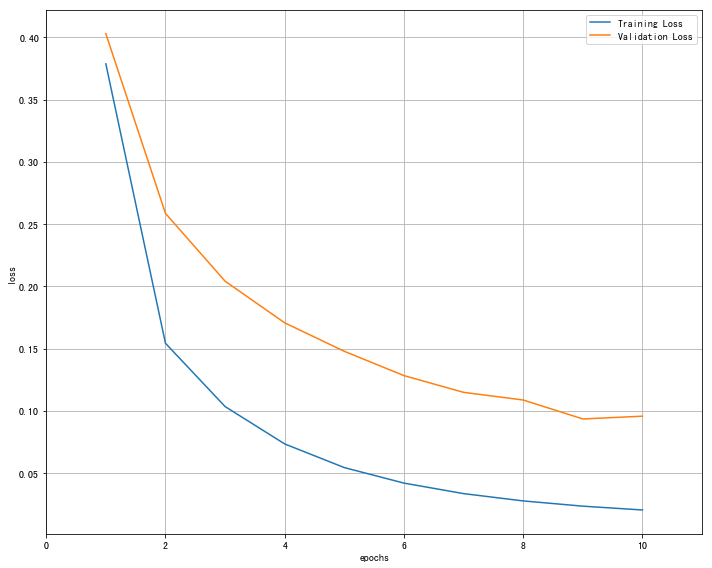

In [333]:
import matplotlib.pyplot as plt
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')



plt.xlabel('epochs')
plt.ylabel('loss')
#plt.ylim(0, 0.5) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

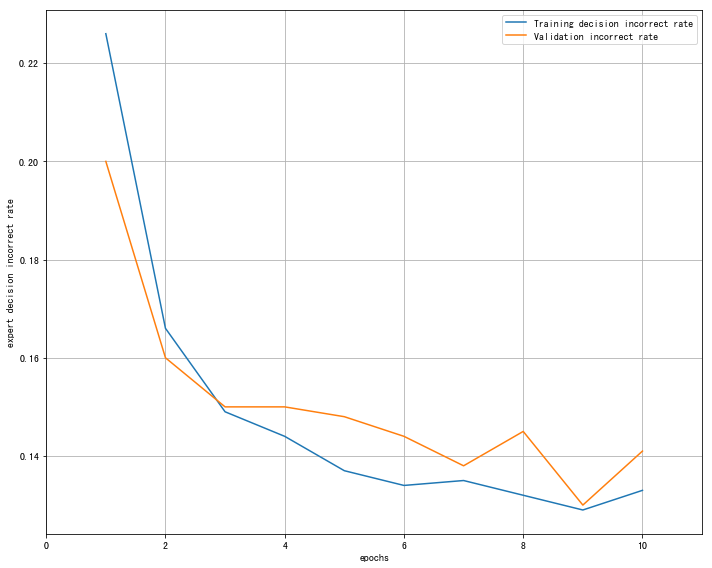

In [334]:
import matplotlib.pyplot as plt
# visualize the loss as the network trained

fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_d)+1),train_d, label='Training decision incorrect rate')
plt.plot(range(1,len(valid_d)+1),valid_d,label='Validation incorrect rate')



plt.xlabel('epochs')
plt.ylabel('expert decision incorrect rate')
#plt.ylim(0, 0.5) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

In [35]:
kBatchSize = 512
kEpochs = 10
w = my_init_module()
train_dataset=data_new[0:6000]
valid_dataset = data_new[5000:6000]
w, train_loss, valid_loss, train_d, valid_d = train_function(w, kBatchSize, kEpochs, 1e-2)

["Epoch: " 1/20] train_loss: 19.83601 valid_loss: 498.34051
                 incorrect train_decisions 2508 / 5000
                 incorrect valid_decisions 1689 / 2000
["Epoch: " 2/20] train_loss: 4878.92271 valid_loss: 46587.46742
                 incorrect train_decisions 2765 / 5000
                 incorrect valid_decisions 1646 / 2000
["Epoch: " 3/20] train_loss: 341068.92188 valid_loss: 1046259.40189
                 incorrect train_decisions 2632 / 5000
                 incorrect valid_decisions 1377 / 2000
["Epoch: " 4/20] train_loss: 4312699.57812 valid_loss: 3408097.59409
                 incorrect train_decisions 2162 / 5000
                 incorrect valid_decisions 824 / 2000
["Epoch: " 5/20] train_loss: 2936401.56250 valid_loss: 1155956.33271
                 incorrect train_decisions 1134 / 5000
                 incorrect valid_decisions 73 / 2000
["Epoch: " 6/20] train_loss: 825401.14062 valid_loss: 306770.60939
                 incorrect train_decisions 173 / 5000
  

In [35]:
%%sql t --preview --quiet
select * from {db}.bdecision_expert_new

,obstacles_all,autocar_name,timestamp,frame_id,git-branch,main_decision,hour,record_name,hdmap_version,heading,intention_type,ref_l,is_auto
0,"[{""expert_decision"":""left_nudge""""type"":""LEFT_N...",zcx-17,1.610696e+09,30100,deliver_food_in_hualikan_week7,stop,15,20210115_144213_zcx-17,hualikan_v0.0.6.r,-3.059977,LANE_BORROW,3.174793,true
1,"[{""expert_decision"":""left_nudge""""type"":""LEFT_N...",zcx-06,1.612925e+09,52010,release-v1.33,stop,10,20210210_090915_zcx-06,hualikan_v0.1.0.r,0.014486,LANE_BORROW,4.061254,true
2,"[{""expert_decision"":""right_nudge""""type"":""RIGHT...",zcx-11,1.612422e+09,8960,logsim_vehicle_simulation,stop,15,20210204_150753_zcx-11,zhonglihai_v1.3.2.r,1.612530,LANE_BORROW,0.250000,true
3,"[{""expert_decision"":""left_nudge""""type"":""LEFT_N...",zcx-17,1.610954e+09,94570,deliver_food_in_hualikan_week7,stop,15,20210118_123115_zcx-17,hualikan_v0.0.6.r,1.838272,LANE_BORROW,2.830826,true
4,"[{""expert_decision"":""left_nudge""""type"":""LEFT_N...",zcx-17,1.610947e+09,27630,deliver_food_in_hualikan_week7,stop,13,20210118_123115_zcx-17,hualikan_v0.0.6.r,-3.110563,LANE_BORROW,2.041400,true
5,"[{""expert_decision"":""left_nudge""""type"":""LEFT_N...",zcx-17,1.611732e+09,92440,deliver_food_in_hualikan_week7,stop,15,20210127_123839_zcx-17,hualikan_v0.0.6.r,-1.519594,LANE_BORROW,2.323056,true
6,"[{""expert_decision"":""left_nudge""""type"":""LEFT_N...",zcx-06,1.611807e+09,19630,release-v1.32,stop,12,20210128_112817_zcx-06,hualikan_v0.0.6.r,-0.004186,LANE_BORROW,1.926477,true
7,"[{""expert_decision"":""left_nudge""""type"":""LEFT_N...",zcx-17,1.610692e+09,70780,deliver_food_in_hualikan_week7,stop,14,20210115_122712_zcx-17,hualikan_v0.0.6.r,0.102875,LANE_BORROW,4.654374,true
8,"[{""expert_decision"":""left_nudge""""type"":""LEFT_N...",zcx-06,1.611377e+09,27700,release-v1.32,stop,12,20210123_120156_zcx-06,hualikan_v0.0.6.r,3.103190,LANE_BORROW,2.810747,true
9,"[{""expert_decision"":""left_nudge""""type"":""LEFT_N...",zcx-17,1.611029e+09,96260,deliver_food_in_hualikan_week7,stop,12,20210119_092059_zcx-17,hualikan_v0.0.6.r,0.028337,LANE_BORROW,2.984292,true


In [53]:
num1 = 0
num2 = 0
train_dataset=[]
valid_dataset = []
for data in data_numpy:
    if data[7][5] == '1':
        num1 += 1
        train_dataset.append(data)
    else:
        valid_dataset.append(data)
        num2 += 1
print(num1)
print(num2)
    

8252
5455


In [61]:
#4 para
train_dataset = train_dataset[:7000]
valid_dataset = valid_dataset[:3000]

kBatchSize = 512
kEpochs = 10
w = my_init_module()
w, train_loss, valid_loss, train_d, valid_d = train_function(w, kBatchSize, kEpochs, 5e-3)

/conda/envs/notebook/lib/python3.6/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/conda/envs/notebook/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


["Epoch: " 0/10] train_loss: nan valid_loss: 0.46709
                 incorrect train_decisions 2056 / 7000
                 incorrect valid_decisions 667 / 3000
tensor([5.0000, 1.0000, 1.0000, 0.4000], requires_grad=True)
["Epoch: " 1/10] train_loss: 0.21348 valid_loss: 0.11537
                 incorrect train_decisions 1033 / 7000
                 incorrect valid_decisions 147 / 3000
tensor([2.2740, 0.7698, 1.2775, 0.6529], requires_grad=True)
["Epoch: " 2/10] train_loss: 0.10530 valid_loss: 0.06836
                 incorrect train_decisions 696 / 7000
                 incorrect valid_decisions 135 / 3000
tensor([1.5709, 0.3970, 1.0394, 0.4557], requires_grad=True)
["Epoch: " 3/10] train_loss: 0.07697 valid_loss: 0.05299
                 incorrect train_decisions 666 / 7000
                 incorrect valid_decisions 130 / 3000
tensor([1.2743, 0.2567, 0.9400, 0.3651], requires_grad=True)
["Epoch: " 4/10] train_loss: 0.02440 valid_loss: 0.04698
                 incorrect train_decision

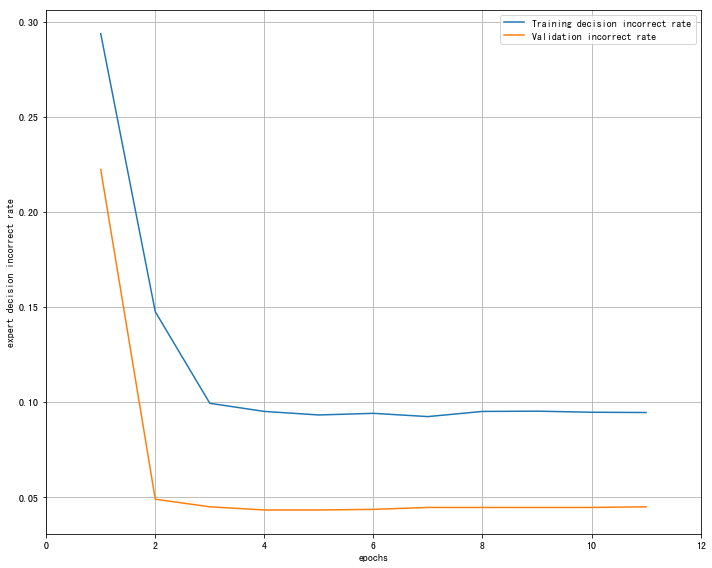

In [62]:
import matplotlib.pyplot as plt
# visualize the accuracy as the network trained

fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_d)+1),train_d, label='Training decision incorrect rate')
plt.plot(range(1,len(valid_d)+1),valid_d,label='Validation incorrect rate')



plt.xlabel('epochs')
plt.ylabel('expert decision incorrect rate')
#plt.ylim(0, 0.5) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('incorrect_decision_rate_plot.png', bbox_inches='tight')

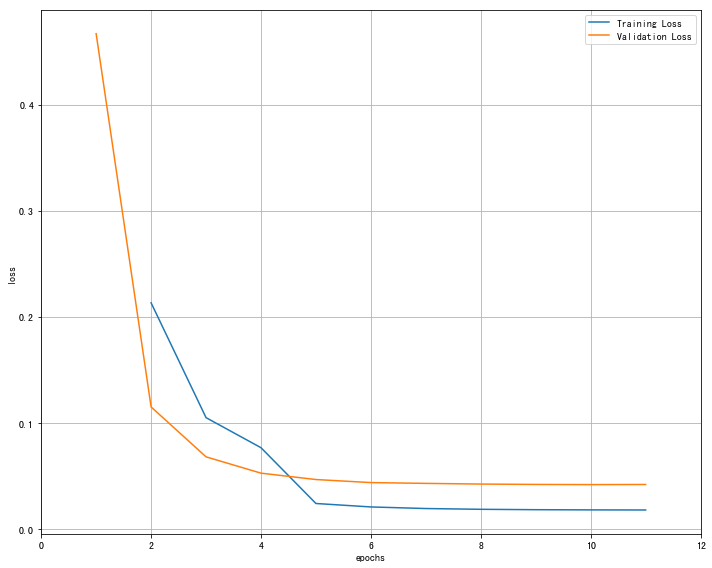

In [63]:
import matplotlib.pyplot as plt
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')



plt.xlabel('epochs')
plt.ylabel('loss')
#plt.ylim(0, 0.5) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

In [100]:
# 6 para
train_dataset = train_dataset[:7000]
valid_dataset = valid_dataset[:3000]

kBatchSize = 512
kEpochs = 10
w = my_init_module()
w, train_loss, valid_loss, train_d, valid_d = train_function(w, kBatchSize, kEpochs, 5e-3)

["Epoch: " 0/10] train_loss: nan valid_loss: 0.53292
                 incorrect train_decisions 2210 / 7000
                 incorrect valid_decisions 786 / 3000
tensor([5.0000, 1.0000, 1.0000, 0.4000, 1.0000, 1.0000], requires_grad=True)
["Epoch: " 1/10] train_loss: 0.17422 valid_loss: 0.12531
                 incorrect train_decisions 1198 / 7000
                 incorrect valid_decisions 154 / 3000
tensor([2.3638, 0.4432, 1.1714, 0.8170, 0.4457, 0.7083], requires_grad=True)
["Epoch: " 2/10] train_loss: 0.06062 valid_loss: 0.07462
                 incorrect train_decisions 746 / 7000
                 incorrect valid_decisions 148 / 3000
tensor([1.6062, 0.2317, 0.9974, 0.5794, 0.2383, 0.5766], requires_grad=True)
["Epoch: " 3/10] train_loss: 0.03616 valid_loss: 0.05730
                 incorrect train_decisions 699 / 7000
                 incorrect valid_decisions 144 / 3000
tensor([1.2921, 0.1547, 0.9199, 0.4707, 0.1601, 0.5195], requires_grad=True)
["Epoch: " 4/10] train_loss: 0.027

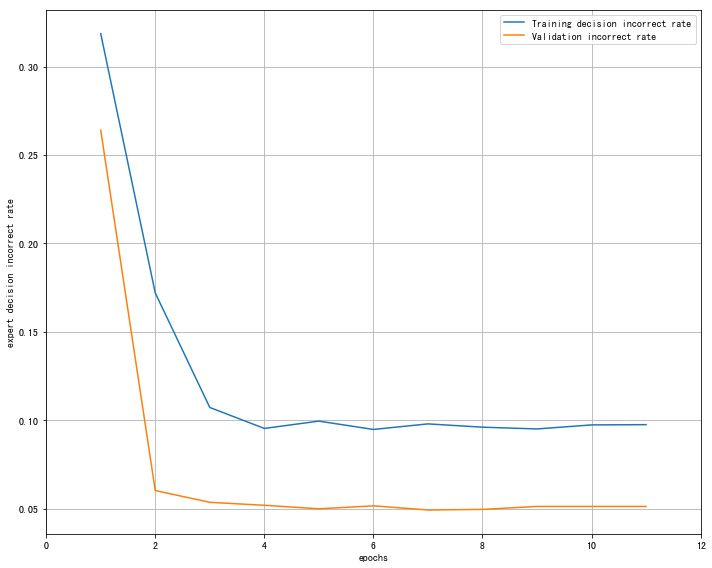

In [70]:
import matplotlib.pyplot as plt
# visualize the accuracy as the network trained

fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_d)+1),train_d, label='Training decision incorrect rate')
plt.plot(range(1,len(valid_d)+1),valid_d,label='Validation incorrect rate')



plt.xlabel('epochs')
plt.ylabel('expert decision incorrect rate')
#plt.ylim(0, 0.5) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('incorrect_decision_rate_plot.png', bbox_inches='tight')

In [110]:
# 7 para, pos updated
train_dataset = train_dataset[:7000]
valid_dataset = valid_dataset[:3000]

kBatchSize = 512
kEpochs = 10
w = my_init_module()
w, train_loss, valid_loss, train_d, valid_d = train_function(w, kBatchSize, kEpochs, 5e-3)

["Epoch: " 0/10] train_loss: nan valid_loss: 0.69610
                 incorrect train_decisions 1489 / 7000
                 incorrect valid_decisions 301 / 3000
tensor([5.0000, 1.0000, 1.0000, 0.4000, 1.0000, 1.0000, 0.2000],
       requires_grad=True)
["Epoch: " 1/10] train_loss: 0.25290 valid_loss: 0.25350
                 incorrect train_decisions 1525 / 7000
                 incorrect valid_decisions 225 / 3000
tensor([-0.1689,  1.8498,  2.1943,  1.1243,  0.4767,  0.9808,  0.3719],
       requires_grad=True)
["Epoch: " 2/10] train_loss: 0.05433 valid_loss: 0.07048
                 incorrect train_decisions 1062 / 7000
                 incorrect valid_decisions 170 / 3000
tensor([ 0.2680,  0.8715,  0.8556,  0.6902, -0.4167,  0.7692,  0.4012],
       requires_grad=True)
["Epoch: " 3/10] train_loss: 0.04641 valid_loss: 0.04537
                 incorrect train_decisions 828 / 7000
                 incorrect valid_decisions 167 / 3000
tensor([ 0.3131,  0.4495,  0.4774,  0.4957, -0.5457

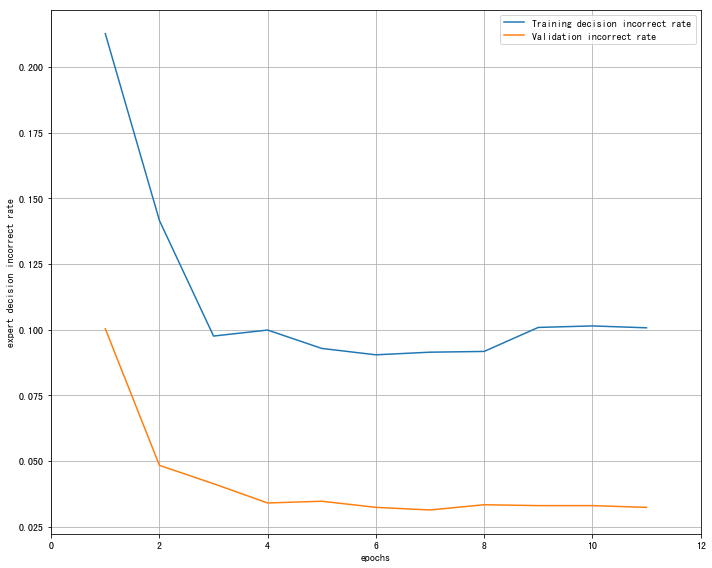

In [108]:
import matplotlib.pyplot as plt
# visualize the accuracy as the network trained

fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_d)+1),train_d, label='Training decision incorrect rate')
plt.plot(range(1,len(valid_d)+1),valid_d,label='Validation incorrect rate')



plt.xlabel('epochs')
plt.ylabel('expert decision incorrect rate')
#plt.ylim(0, 0.5) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('incorrect_decision_rate_plot.png', bbox_inches='tight')